In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('/content/employee_burnout.xlsx')
df.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score


# Handle missing values (replace with mean for numerical features)
for col in df.select_dtypes(include=['number']):
    df[col] = df[col].fillna(df[col].mean())

# Handle duplicate values
df.drop_duplicates(inplace=True)

# Feature selection (example: choose relevant features)
features = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation']
target = 'Mental Fatigue Score'

# Preprocessing categorical features
le = LabelEncoder()
for col in features:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

X = df[features]
y = df[target]

# Normalize numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Example user input for prediction
new_data = pd.DataFrame({
    'Gender': [1],  # Example value, replace with actual user input
    'Company Type': [0],
    'WFH Setup Available': [1],
    'Designation': [2],
    'Resource Allocation': [5.0]
})

# Preprocess the new data
new_data_scaled = scaler.transform(new_data)

# Predict mental fatigue score
new_pred = model.predict(new_data_scaled)
print("Predicted mental fatigue score: ", new_pred)

Mean Squared Error: 1.4964598670619698
R-squared: 0.5476930132947443
Predicted mental fatigue score:  [5.96986878]


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Handle missing values (replace with mean for numerical features)
df['Mental Fatigue Score'].fillna(df['Mental Fatigue Score'].mean(), inplace=True)
df['Burn Rate'].fillna(df['Burn Rate'].mean(), inplace=True)
df['Resource Allocation'].fillna(df['Resource Allocation'].mean(), inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Feature selection (include 'Mental Fatigue Score')
features = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation', 'Mental Fatigue Score']
target = 'Burn Rate'
X = df[features]
y = df[target]

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Function to predict burn rate for new data
def predict_burn_rate():
    print("Enter the following information for prediction:")
    gender = int(input("Gender (1 for Male, 0 for Female): "))
    company_type = int(input("Company Type (1 for Product, 0 for Service): "))
    wfh_setup = int(input("WFH Setup Available (1 for Yes, 0 for No): "))
    designation = int(input("Designation (0-5): "))
    resource_allocation = float(input("Resource Allocation (1.0-10.0): "))
    mental_fatigue_score = float(input("Mental Fatigue Score (0.0-10.0): "))
    new_data = pd.DataFrame({
        'Gender': [gender],
        'Company Type': [company_type],
        'WFH Setup Available': [wfh_setup],
        'Designation': [designation],
        'Resource Allocation': [resource_allocation],
        'Mental Fatigue Score': [mental_fatigue_score]
    })
    new_data_scaled = scaler.transform(new_data)  # Normalize new data
    predicted_burn_rate = model.predict(new_data_scaled)
    print(f"Predicted Burn Rate: {predicted_burn_rate[0]}")

# Get predictions for new data
predict_burn_rate()

<ipython-input-3-5250fc8799c4>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Burn Rate'].fillna(df['Burn Rate'].mean(), inplace=True)
<ipython-input-3-5250fc8799c4>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Mean Squared Error: 0.006100411758098734
R-squared: 0.830518522407669
Enter the following information for prediction:
Gender (1 for Male, 0 for Female): 0
Company Type (1 for Product, 0 for Service): 0
WFH Setup Available (1 for Yes, 0 for No): 0
Designation (0-5): 2
Resource Allocation (1.0-10.0): 3
Mental Fatigue Score (0.0-10.0): 3.8
Predicted Burn Rate: 0.288172479508953


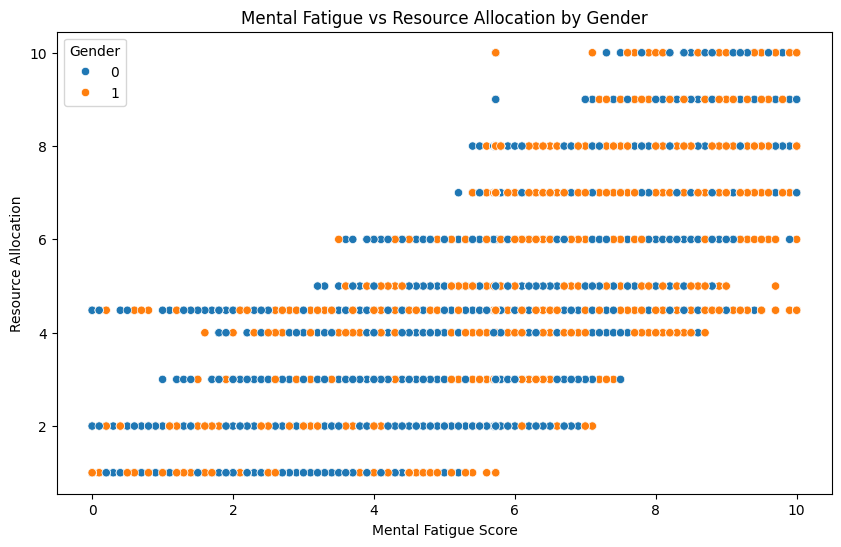

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mental Fatigue Score', y='Resource Allocation', hue='Gender', data=df)
plt.title('Mental Fatigue vs Resource Allocation by Gender')
plt.xlabel('Mental Fatigue Score')
_ = plt.ylabel('Resource Allocation')

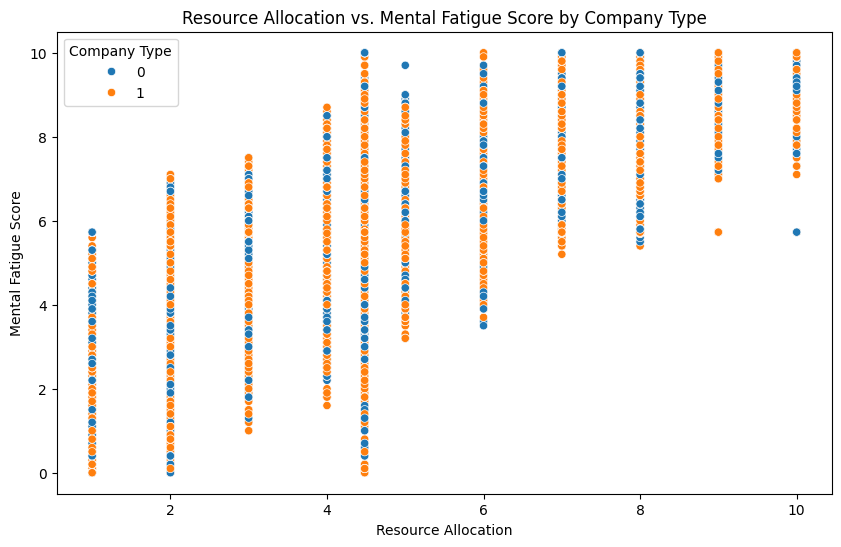

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Resource Allocation', y='Mental Fatigue Score', hue='Company Type', data=df)
plt.title('Resource Allocation vs. Mental Fatigue Score by Company Type')
plt.xlabel('Resource Allocation')
_ = plt.ylabel('Mental Fatigue Score')

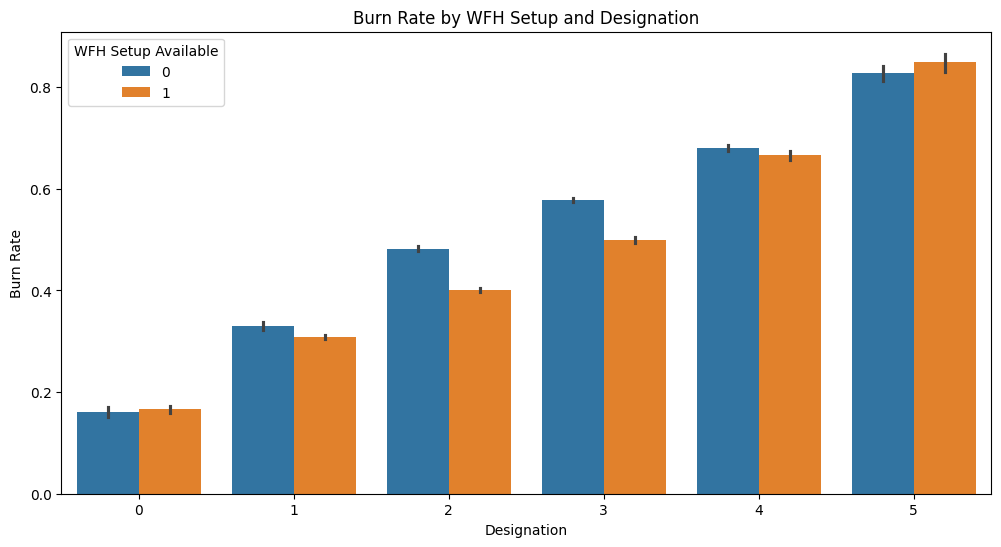

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Designation', y='Burn Rate', hue='WFH Setup Available', data=df)
plt.title('Burn Rate by WFH Setup and Designation')
plt.xlabel('Designation')
_ = plt.ylabel('Burn Rate')

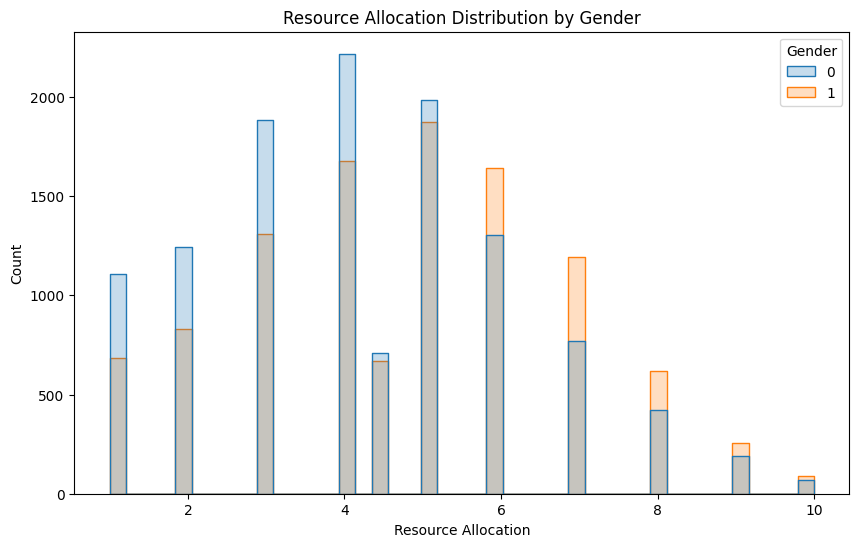

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(x='Resource Allocation', hue='Gender', data=df, element='step')
plt.title('Resource Allocation Distribution by Gender')
plt.xlabel('Resource Allocation')
_ = plt.ylabel('Count')

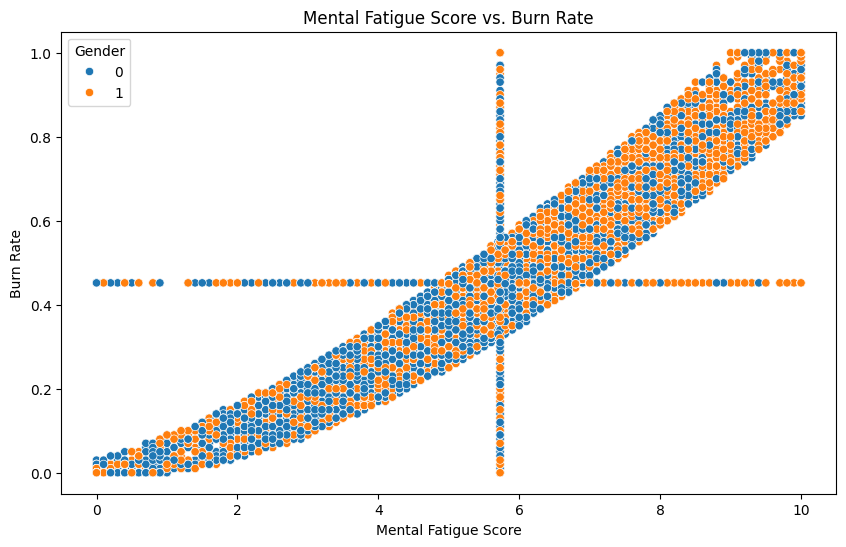

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mental Fatigue Score', y='Burn Rate', hue='Gender', data=df)
plt.title('Mental Fatigue Score vs. Burn Rate')
plt.xlabel('Mental Fatigue Score')
_ = plt.ylabel('Burn Rate')

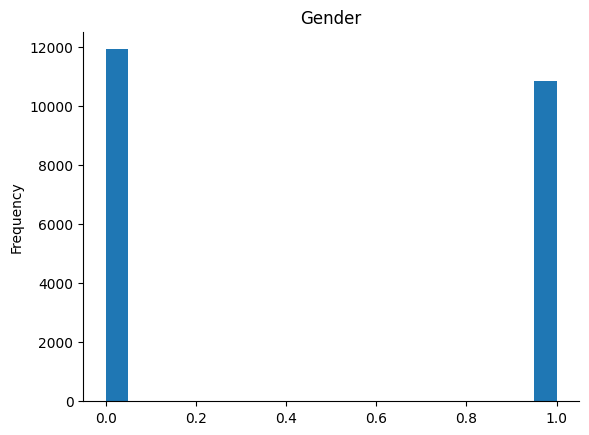

In [9]:
from matplotlib import pyplot as plt
df['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

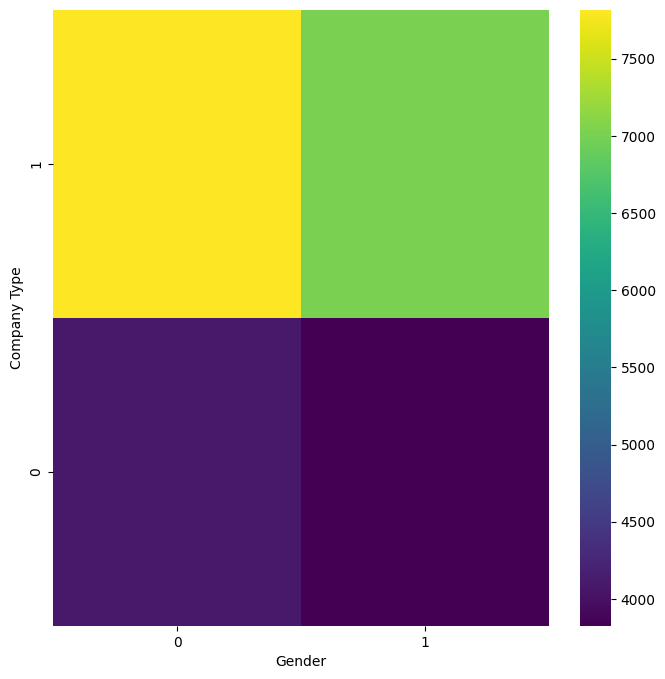

In [10]:

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Company Type'].value_counts()
    for x_label, grp in df.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Company Type')